## Examples of using the Mondrian forest and tree classifiers (not online versions).

In [1]:
include("Mondrian_Forest_Classifier.jl")

show_mondrian_split_2d

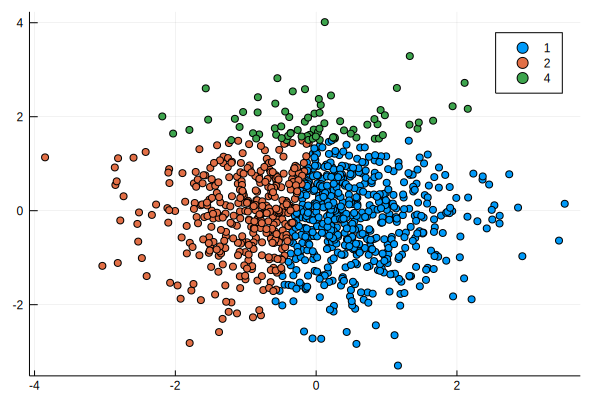

In [2]:
using MLBase
using Plots

function Fakedata3Classif(N,d,N_test=0)
    X = randn((N,d))
    param1 = randn(d)
    param2 = randn(d)
    Y = ( sum(X*param1,2) .> mean(sum(X*param2,2)) )
    Y=convert(Array{Int},Y)
    for i in 1:size(X,1)
        if X[i,2] > 1.5
            Y[i] = 3
        end
    end
    if (N_test > 0)
        x = randn((N_test,d))
        y = ( sum(x*param1,2) .> mean(sum(x*param2,2)) )
        y=convert(Array{Int},y)
        for i in 1:size(x,1)
            if x[i,2] > 1.5
                y[i] = 3
            end
        end
        return X,Y,x,y
    end
    return X,Y
end

X, Y, x, y = Fakedata3Classif(1000,2,1000);
Y = Y.+1;
y = y.+1;

if size(X,2)==2
    plot()
    for class in unique(Y)
        scatter!(X[Y.==class,1],X[Y.==class,2],label="$class")
    end
    plot!()
end

## Mondrian tree classifier

In [4]:
# initialise a mondreian tree classifier object with an empty tree
# and empty data. NB the underlying mondrian tree can be accessed by MT.Tree (see visualisation)
MT = Mondrian_Tree_Classifier()
# trains the tree and sets MT.X and MT.Y to the given training data
train!(MT,X,Y,1e16)

# predict on training and testing
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MT, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

# give the raw probs
predict_proba!(MT,x[1:10,:])

Train Accuracy
0.911
Accuracy
0.871


10-element Array{Any,1}:
 [0.0, 1.0, 0.0]          
 [0.0, 1.0, 0.0]          
 [0.0, 1.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [1.0, 0.0, 0.0]          
 [0.666667, 0.333333, 0.0]
 [0.0, 1.0, 0.0]          
 [1.0, 0.0, 0.0]          

In [4]:
# the data has been added
println(MT.X[1:10,:])
println(MT.Y[1:10])

[0.0332089 -0.589304; 1.49493 0.217727; -1.39631 -0.32612; -0.0424209 -0.152892; 0.173206 0.250616; 0.102563 -1.08482; 2.07876 1.50455; 0.344775 0.360504; 0.938482 -0.539204; 0.474317 -0.641493]
[2, 1, 2, 2, 1, 2, 4, 1, 2, 2]


## Visualisation

Based on DecisionTree.jl print_tree function. TODO draw with Graphs.jl

In [5]:
MT = Mondrian_Tree_Classifier()
# low λ value to show the plotting
train!(MT,X,Y,0.6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# print the text based vis
print_mondrian_tree(get(MT.Tree.root))

Train Accuracy
0.55
τ: 0.388
L-> τ: 0.464
    L-> Prediction: [0.0, 1.0, 0.0]
    R-> τ: 0.528
        L-> Prediction: [0.486, 0.514, 0.0]
        R-> Prediction: [0.774, 0.226, 0.0]
R-> τ: 0.517
    L-> τ: 0.521
        L-> Prediction: [0.563, 0.437, 0.0]
        R-> Prediction: [0.998, 0.002, 0.0]
    R-> Prediction: [0.993, 0.007, 0.0]


### The splits can be visualised for an individual Mondrian_Tree_Classifier

Here a plot and animation are returned, plot is the final still. If animation=false
then a one frame animation and plot are returned (both the final plot).

In [3]:
X, Y, x, y = FakedataClassif(100,2,25);
Y = Y.+1;
y = y.+1;

MT = Mondrian_Tree_Classifier()
train!(MT,X,Y,1e6)
pred=predict!(MT, X)
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))

# plots the splits for a Mondrian_Tree_Classifier in 2_d could do
# higher d but would only plot dimension 1,2
f,a = show_mondrian_split_2d(MT,Data=true,animation=true);
gif(a,"resources/MT.gif",fps=1)

Train Accuracy
0.96


INFO: Saved animation to /home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif


Plots.AnimatedGif("/home/harvey/Group Project/warwick-rsg/MondrianForest/resources/MT.gif")

# Mondrian Forest classifier

Python has $\sim 27 - 33$ seconds runtime, $\sim 276-619$ MiB of memory allocations, and about $0.8-0.92$ accuracy on an
equivalent problem

See [python comparison](comparisons/python_comp.ipynb) and the plots below. S


![alt text](comparisons/n_tree_scale.png)

Yet to update data scale with paused mondrians and parallel training

![alt text](comparisons/n_data_scale.png)

In [55]:
X, Y, x, y = FakedataClassif(1000,5,100);
Y = Y.+1;
y = y.+1;

# creates a mondrian forest classifier with 100 mondrian tree classifiers
MF = Mondrian_Forest_Classifier(100)
# time and memory separately
tic()
train!(MF, X, Y, 1e9)
toc()
# prediction is greatest time hog
tic()
pred=predict!(MF, X);
toc()
println("Train Accuracy")
println(correctrate(Y,convert(Array{Int,1},pred)))
pred=predict!(MF, x)
println("Accuracy") 
println(correctrate(y,convert(Array{Int,1},pred)))

MF = Mondrian_Forest_Classifier(100)
println("Allocations: ", @allocated(train!(MF,X,Y,1e9))/1e6, " Mb")

elapsed time: 0.000153456 seconds
elapsed time: 0.427995514 seconds
Train Accuracy
0.986
Accuracy
0.98
Allocations: 0.002416 Mb


In [15]:
predict_proba!(MF,x[1:10,:])

10-element Array{Array{Float64,1},1}:
 [0.561996, 0.438004]
 [0.301273, 0.698727]
 [0.211188, 0.788812]
 [0.783507, 0.216493]
 [0.53231, 0.46769]  
 [0.436924, 0.563076]
 [0.553988, 0.446012]
 [0.638269, 0.361731]
 [0.217997, 0.782003]
 [0.603067, 0.396933]

# MLBase Gridtune

Something is wrong here

In [8]:
d=2
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

In [9]:
# Currently adding @parallel to the for loop in train! causes
# train! within MLBase's gridtune to be unable to modify the
# Mondrian_Forest_Classfier Trees array....
function train_for_mlbase!(MF::Mondrian_Forest_Classifier,
                X::Array{Float64,2},
                Y::Array{Int64},
                λ::Float64=1e9)

    for i in 1:MF.n_trees
        MT = Mondrian_Tree_Classifier()
        train!(MT, X, Y, λ)
        push!(MF.Trees,MT)
    end
    MF.X = X
    MF.Y = Y
end

function estfun(n_trees,λ)
    MF = Mondrian_Forest_Classifier()
    train_for_mlbase!(MF,X,Y,λ)
    return MF
end

function evalfun(MF)
    return correctrate(y, predict!(MF,x))
end

@time best_model, best_config, best_score = gridtune(estfun, 
                                               evalfun, 
                                               ("n_trees",[10,100,250,500]),
                                               ("λ",[1e1,1e2,1e4,1e8,1e16]),
                                               verbose=true
)
println("\nBest Configuration: ", best_config)
println("\nBest score: ", best_score)

[n_trees=10, λ=10.0] => 0.76
[n_trees=100, λ=10.0] => 0.75
[n_trees=250, λ=10.0] => 0.77
[n_trees=500, λ=10.0] => 0.76
[n_trees=10, λ=100.0] => 0.73
[n_trees=100, λ=100.0] => 0.76
[n_trees=250, λ=100.0] => 0.75
[n_trees=500, λ=100.0] => 0.76
[n_trees=10, λ=10000.0] => 0.8
[n_trees=100, λ=10000.0] => 0.74
[n_trees=250, λ=10000.0] => 0.76
[n_trees=500, λ=10000.0] => 0.76
[n_trees=10, λ=1.0e8] => 0.77
[n_trees=100, λ=1.0e8] => 0.76
[n_trees=250, λ=1.0e8] => 0.73
[n_trees=500, λ=1.0e8] => 0.78
[n_trees=10, λ=1.0e16] => 0.73
[n_trees=100, λ=1.0e16] => 0.76
[n_trees=250, λ=1.0e16] => 0.75
[n_trees=500, λ=1.0e16] => 0.74
  2.883790 seconds (24.32 M allocations: 735.568 MiB, 8.15% gc time)

Best Configuration: (10, 10000.0)

Best score: 0.8


This benchmark is a little unbelievable... but the accuracy is still good, perhaps it is the
paused mondrians (the python does use these though) or Julia's time function is not working 

5.5332e-5
  0.000803 seconds (34.30 k allocations: 641.328 KiB)
2
4.5761e-5
  0.001856 seconds (65.02 k allocations: 1.139 MiB)
4
3.1903e-5
  0.003837 seconds (149.99 k allocations: 2.523 MiB)
8
3.5567e-5
  0.008582 seconds (301.99 k allocations: 5.018 MiB)
16
3.7716e-5
  0.015181 seconds (579.55 k allocations: 9.611 MiB)
32
3.7922e-5
  0.032577 seconds (1.17 M allocations: 19.323 MiB)
64
4.88e-5
  0.066437 seconds (2.23 M allocations: 36.889 MiB, 10.46% gc time)
128
4.001e-5
  0.133574 seconds (4.60 M allocations: 75.886 MiB, 6.36% gc time)
256
3.2326e-5
  0.249968 seconds (9.15 M allocations: 150.975 MiB, 6.30% gc time)
512
Any[5.5332e-5, 4.5761e-5, 3.1903e-5, 3.5567e-5, 3.7716e-5, 3.7922e-5, 4.88e-5, 4.001e-5, 3.2326e-5]
Any[0.74, 0.87, 0.88, 0.86, 0.92, 0.96, 0.95, 0.97, 0.95]


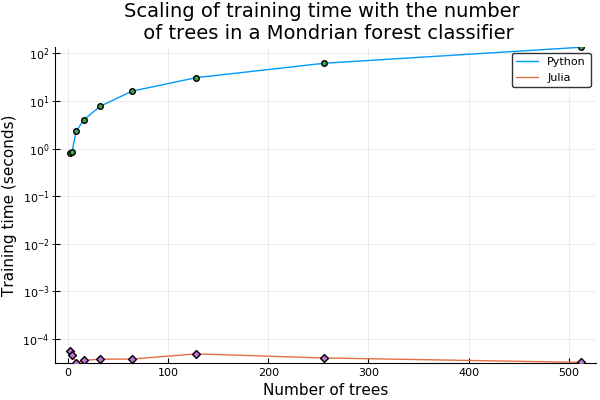

In [10]:
d=5
X, Y, x, y = FakedataClassif(1000,d,100);
Y = Y.+1;
y = y.+1;

time = []
acc = []
trees = []
for j in collect(1:9)
    push!(trees,2^j)
    MF = Mondrian_Forest_Classifier(2^j)
    tic()
    train!(MF,X,Y,1e9)
    t = toq()
    println(t)
    push!(time,t)
    @time pred=predict!(MF, x);
    push!(acc,correctrate(y,convert(Array{Int,1},pred)))
    println(MF.n_trees)
end

println(time)
println(acc)

using CSV
times_py = convert(Array{Float64,1},CSV.read("comparisons/times_py")[2])
pyplot()

plot(trees,times_py,label="Python", yscale=:log10)
plot!(trees,time,label="Julia", yscale=:log10)
scatter!(trees,times_py,label="")
scatter!(trees,time,label="",markershape=:auto)
title!("Scaling of training time with the number \n of trees in a Mondrian forest classifier")
xlabel!("Number of trees")
ylabel!("Training time (seconds)")